# **Regresión lineal**

## Introducción

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. 

Dependiendo del contexto, a la variable modelada se conoce como variable dependiente, endógena o variable respuesta, y a las variables independientes como regresores, predictores, exógenas o features.

## Modelos de regresión lineal en Python

Dos de las implementaciones de modelos de regresión lineal más utilizadas en Python son: ``scikit-learn ``y ``statsmodels``. Aunque ambas están muy optimizadas, ``Scikit-learn`` está orientada principalmente a la **predicción**, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer **inferencia**. ``Statsmodels`` es mucho más completo en este sentido.

$$ yi=β0+β1xi1+β2xi2+...+βpxip+ϵi $$

En la gran mayoría de casos, los valores  $β0$ y  $βj$
poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones  $β^0$   y  $β^j$

Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud (likelihood), es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

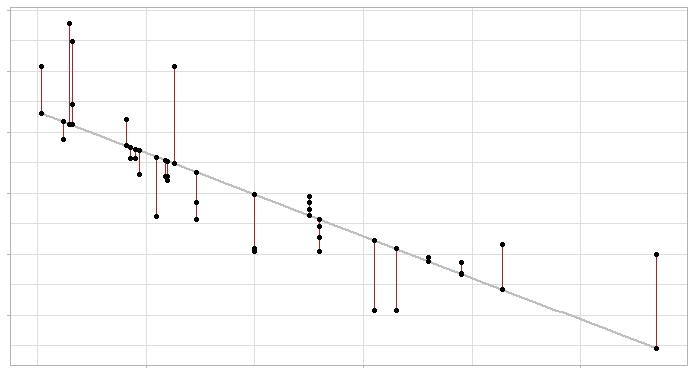

# La **Regresión lineal** como modelo

La regresión lineal es un modelo y como tal, es una simplificación de la realidad y, por ello, impone ciertos requisitos y limitaciones:

1. Relación lineal entre los predictores numéricos y la variable respuesta
    * Número de trabajadoras/es vs producción (rendiminetos marginales decrecientes, saturación)
    * Edulcorante vs apreciación positiva del sabor: llega a ser tan dulce que me gusta cada vez menos.

2. No colinealidad o multicolinealidad, esto es, un predictor no puede ser estar linealmente relacionado con uno o varios de los otros predictores del modelo 
    * Precio en euros y libras
    * Edad en años y meses

3. Distribución normal de la variable respuesta
    * Hacer gráficos y análisis

4. Varianza constante de la variable respuesta (homocedasticidad)
    * Random walk

5. No autocorrelación (Independencia de las observaciones)
    * El valor el bolsa de una acción hoy esta autocorrelada con su propio valor ayer

6. Sensible a outliers

7. Sensible al tamaño de la muestra, sobre todo para muestras muy pequeñas

8. Parsimonia: se prefiere un modelo que explica con mayor precisión y menor número de variables 

9. Mínimos cuadrados: ¿quieres minimizar la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.
    * En el gráfico anterior: precio que minimiza perder dinero



#### Ejemplo de heterocedasticidad

##### Gráfico izquierda: diferencia de riqueza entre personas a medida que se vuelve más compleja una sociedad 
##### Gráfico derecha: diferencia de luminosidad de sol con los años

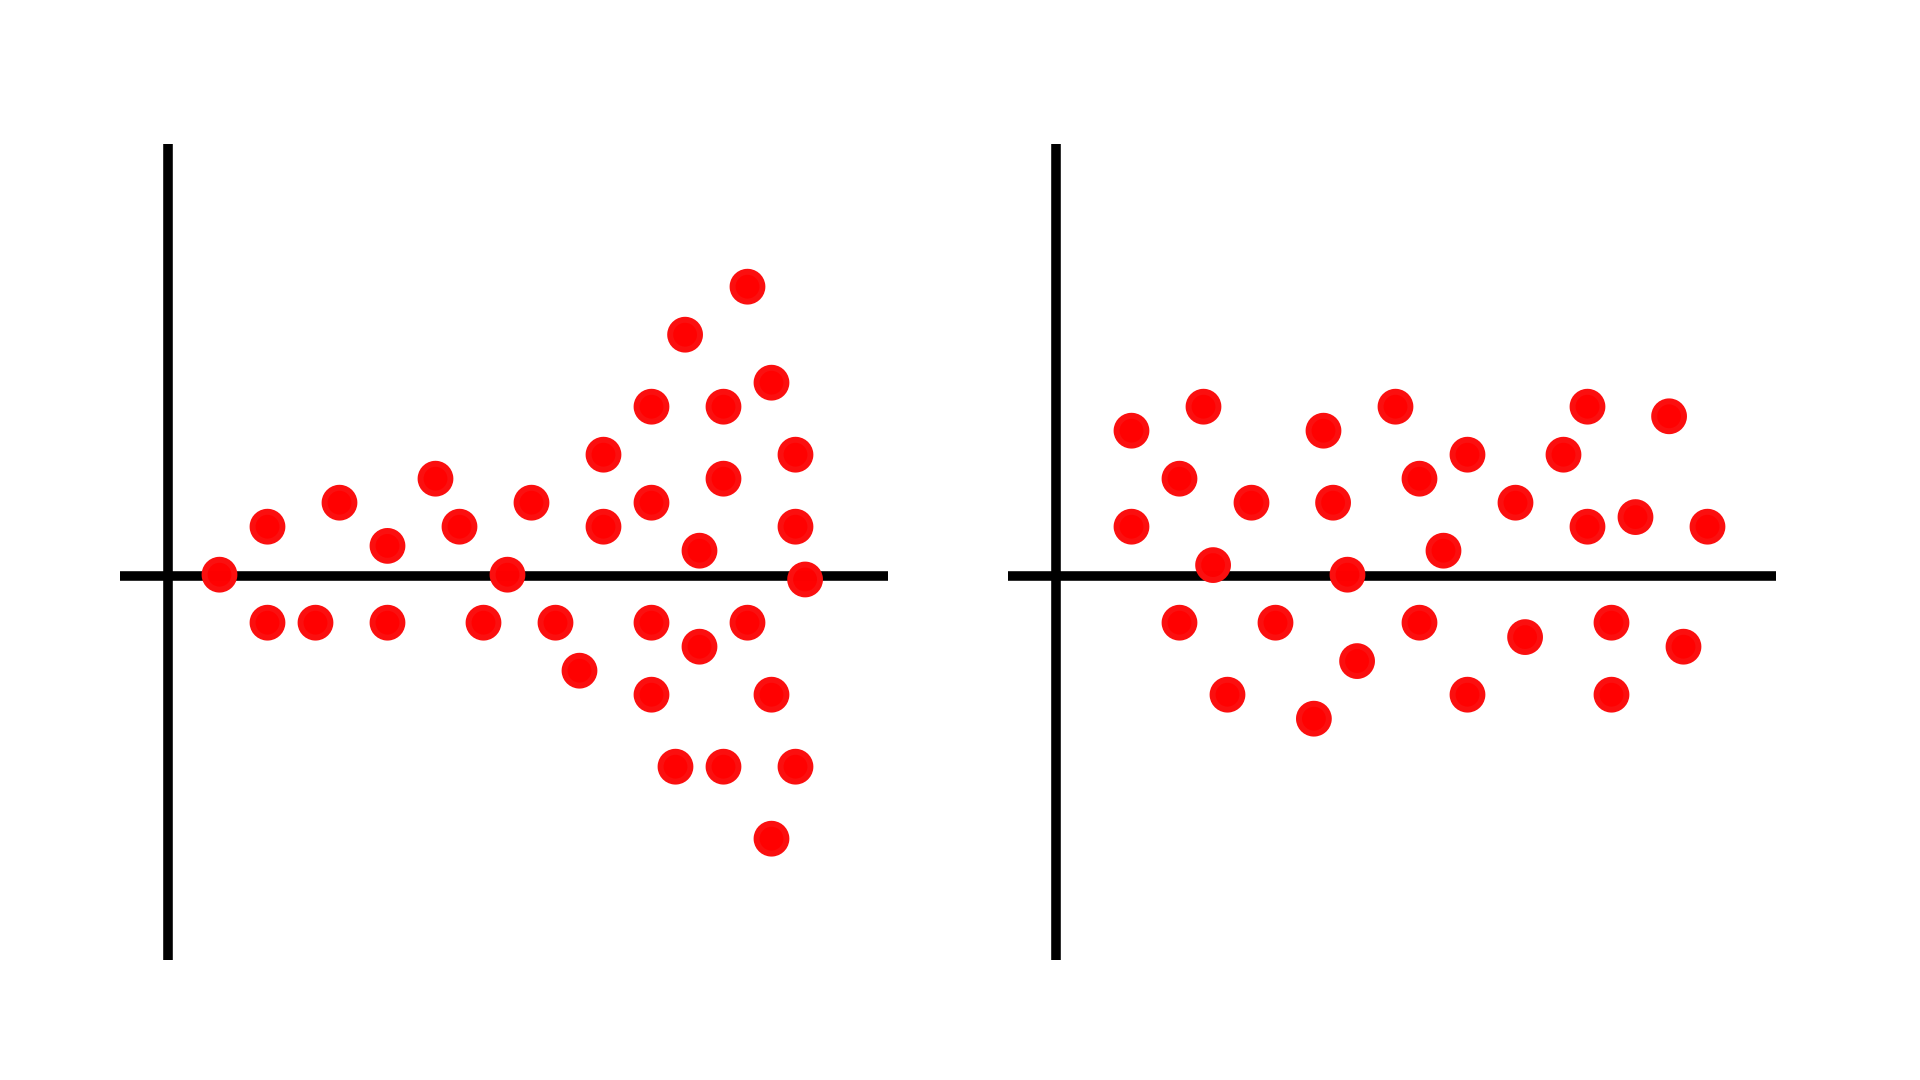

# La regresión lineal

(5000.0, 50000.0)

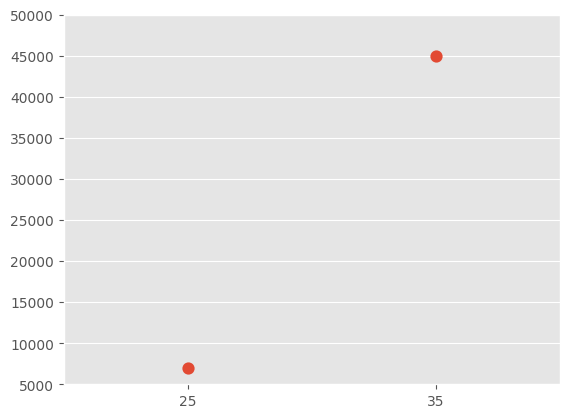

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
points = [(25, 35), (7000, 45000)]
sns.pointplot(x=points[0], y=points[1], linestyles="")
plt.ylim(5000, 50000)


(5000.0, 50000.0)

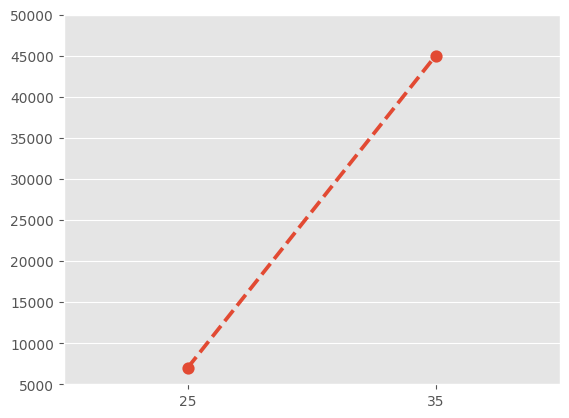

In [71]:
sns.pointplot(x=points[0], y=points[1], linestyles="--")
plt.ylim(5000, 50000)

(5000.0, 50000.0)

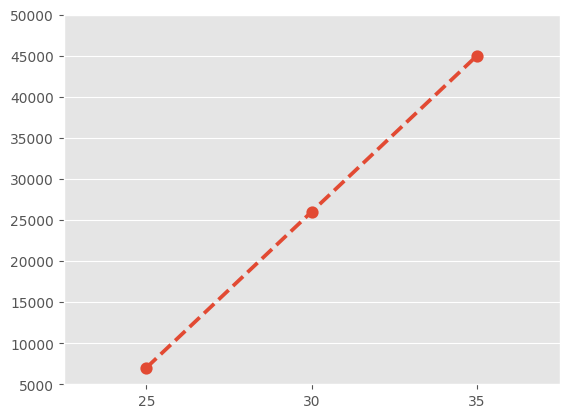

In [72]:
points = [(25, 30, 35), (7000, 26000, 45000)]
sns.pointplot(x=points[0], y=points[1], linestyles="--")
plt.ylim(5000, 50000)

(5000.0, 50000.0)

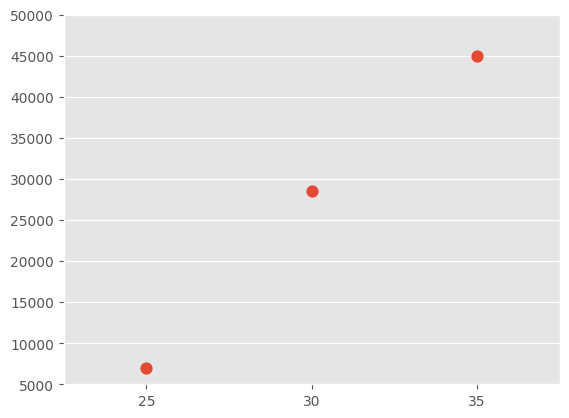

In [73]:
points = [(25, 30, 35), (7000, 28500, 45000)]
sns.pointplot(x=points[0], y=points[1], linestyles="")
plt.ylim(5000, 50000)

(5000.0, 50000.0)

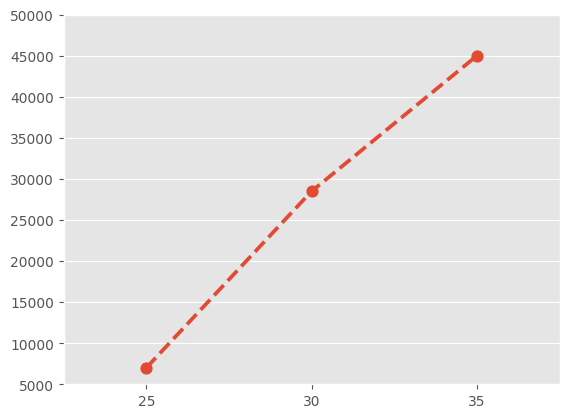

In [74]:
sns.pointplot(x=points[0], y=points[1], linestyles="--")
plt.ylim(5000, 50000)

# ¡Tenemos que encontrar la recta que minimiza los errores!

Entendemos los errores como minimizar la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

(24.0, 36.0)

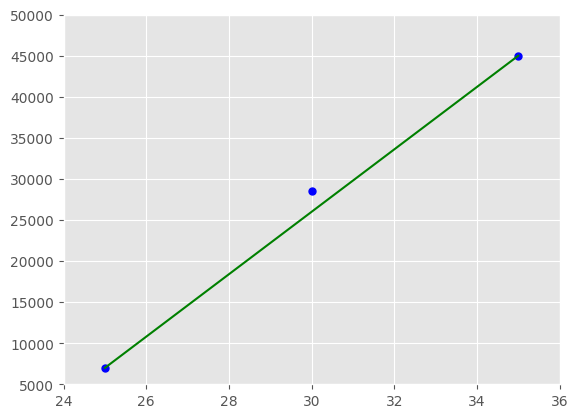

In [75]:
fig, ax = plt.subplots()
plt.plot(points[0], points[1], 'ro', markersize=5,color="blue", )
points_1 = [(25, 35), (7000, 45000)]
plt.plot(points_1[0], points_1[1], color="green")
plt.ylim(5000, 50000)
plt.xlim(24, 36)

(24.0, 36.0)

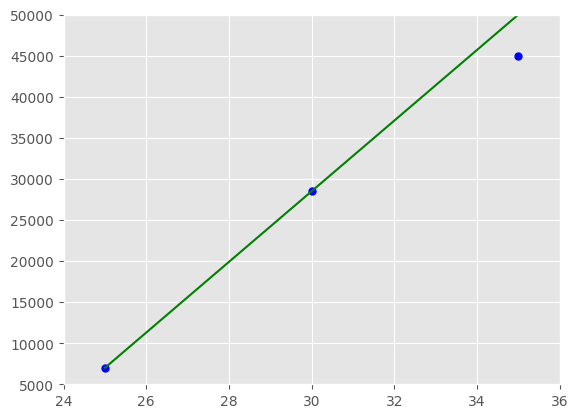

In [76]:
fig, ax = plt.subplots()
plt.plot(points[0], points[1], 'ro', markersize=5,color="blue", )
points_1 = [(25, 30, 35), (7000, 28500, 50000)]
plt.plot(points_1[0], points_1[1], color="green")
plt.ylim(5000, 50000)
plt.xlim(24, 36)

(24.0, 36.0)

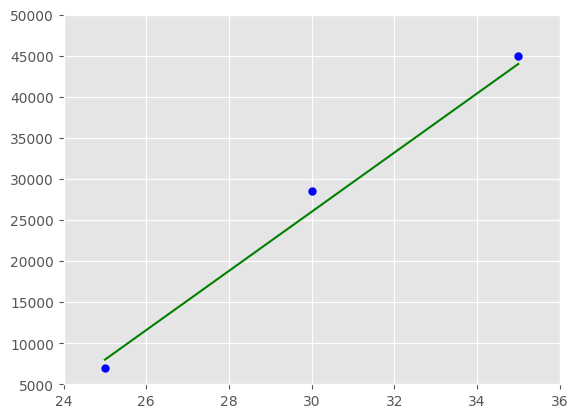

In [77]:
fig, ax = plt.subplots()
plt.plot(points[0], points[1], 'ro', markersize=5,color="blue" )
points_1 = [(25, 30, 35), (8000, 26000, 44000)]
plt.plot(points_1[0], points_1[1], color="green")
plt.ylim(5000, 50000)
plt.xlim(24, 36)

# A medida que incrementamos los datos, el "ojimétro" cada vez es menos intuitivo

(5000.0, 50000.0)

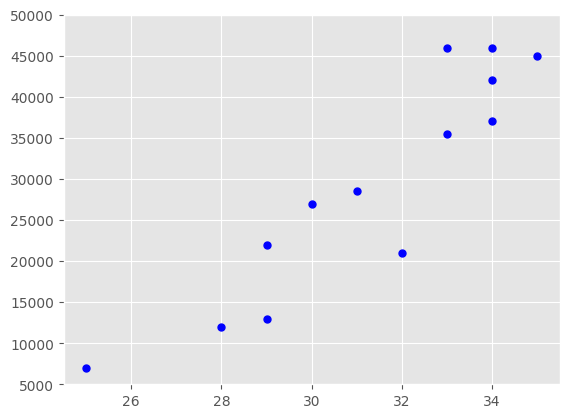

In [78]:
points = [(25,28, 29, 29, 30, 31, 32, 33, 33, 34, 34, 34, 35), (7000, 12000, 13000, 22000, 27000, 28500, 21000, 35500, 46000, 37000, 42000, 46000,45000)]
plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )
plt.ylim(5000, 50000)

In [79]:
np.corrcoef(points)

array([[1.        , 0.91882114],
       [0.91882114, 1.        ]])

In [97]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
import statsmodels.api as sm
X_train = points[0]

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=np.array(points[1])*100, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     59.62
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           9.14e-06
Time:                        20:47:48   Log-Likelihood:                -189.54
No. Observations:                  13   AIC:                             383.1
Df Residuals:                      11   BIC:                             384.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.04e+07   1.73e+06     -5.996      0.0

In [81]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2505.139501,3817.554112,-5897.240448,10907.519449,-12501.310226,17511.589227
1,15289.280470,2405.683481,9994.406829,20584.154110,1775.242159,28803.318781
2,19550.660793,2019.131636,15106.582025,23994.739561,6346.745438,32754.576148
3,19550.660793,2019.131636,15106.582025,23994.739561,6346.745438,32754.576148
4,23812.041116,1725.011004,20015.317495,27608.764737,10811.708241,36812.373991
5,28073.421439,1575.951841,24604.774823,31542.068055,15165.088706,40981.754172
6,32334.801762,1612.692249,28785.290053,35884.313471,19404.504860,45265.098664
7,36596.182085,1824.039259,32581.498744,40610.865426,23530.531434,49661.832736
8,36596.182085,1824.039259,32581.498744,40610.865426,23530.531434,49661.832736
9,40857.562408,2159.317714,36104.936163,45610.188653,27546.627023,54168.497793


In [83]:
modelo.params


array([-104029.36857562,    4261.38032305])

In [86]:
preds = [modelo.params[0] + x*modelo.params[1] for x in points[0]]

(2000.0, 50000.0)

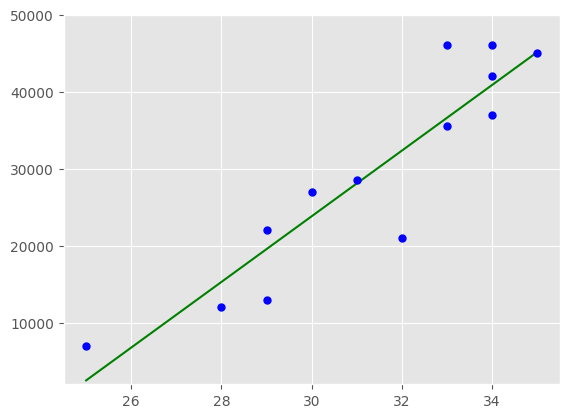

In [87]:
plt.plot(points[0], predicciones["mean"], markersize=5,color="green" )
plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )
plt.ylim(2000, 50000)

## Interpretación de nuestro modelo como regresión lineal simple

1. **const**: también llamado β0 o intercept, es el valor esperado de la variable respuesta cuando todos los predictores son cero. Puede tener sentido o no. En nuestro caso, no parece tenerlo

2. **x1**: tambien llamado β1. Es el coeficiente de regresión, al incrementar/decrementar en X unidades la edad, se incrementa/decrementa en β1*X unidades la riqueza acumulada

In [93]:
# Reconstruye las prediciones usando modelo.params
# ¿Cuál sería la riqueza predicha para una persona de 26 años?
riqueza = modelo.params[0] + 26*modelo.params[1]
# ¿Cuál sería el incremento esperado de riqueza en 3 años?
riqueza = modelo.params[0] + 26*modelo.params[1] * 3
# ¿Cuál sería la predicción de riqueza para un recien nacido?
riqueza = modelo.params[0]
# Cálcula el error de este modelo
# Cálcula el error de otro modelo muy parecido. ¿Es realmente el mejor?
riqueza

-104029.36857562435

Nota: cambiar de unidades las variables solo reescala el modelo, pero el resultado es el mismo

In [95]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
import statsmodels.api as sm
X_train = np.array(points[0])*12

X_train = sm.add_constant(X_train, prepend=True)
modelo_meses = sm.OLS(endog=points[1], exog=X_train,)
modelo_meses = modelo_meses.fit()
print(modelo_meses.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     59.62
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           9.14e-06
Time:                        20:46:03   Log-Likelihood:                -189.54
No. Observations:                  13   AIC:                             383.1
Df Residuals:                      11   BIC:                             384.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.04e+07   1.73e+06     -5.996      0.0

In [94]:
# Prueba a pasar los euros a centimos
preds = [modelo.params[0] + x*modelo.params[1]*100 for x in points[1]]
# Prueba a pasar los euros a libras
preds = [modelo.params[0] + x*modelo.params[1]*100 for x in points[1]]
# Prueba a desordenar los datos

# Sensible a outliers

C:\Users\pabma\AppData\Local\Temp\ipykernel_28800\1085475676.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )


(5000.0, 60000.0)

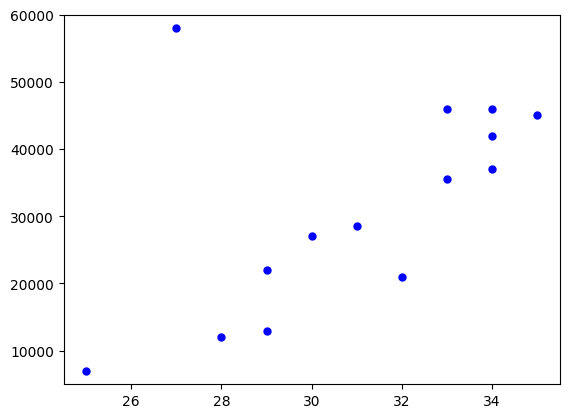

In [ ]:
points = [(25, 27, 28, 29, 29, 30, 31, 32, 33, 33, 34, 34, 34, 35), (7000, 58000, 12000, 13000, 22000, 27000, 28500, 21000, 35500, 46000, 37000, 42000, 46000,45000)]
plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )
plt.ylim(5000, 60000)

In [ ]:

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
import statsmodels.api as sm
X_train = points[0]

X_train = sm.add_constant(X_train, prepend=True)
modelo_o = sm.OLS(endog=points[1], exog=X_train,)
modelo_o = modelo_o.fit()
print(modelo_o.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     5.137
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0427
Time:                        19:39:16   Log-Likelihood:                -151.68
No. Observations:                  14   AIC:                             307.4
Df Residuals:                      12   BIC:                             308.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.293e+04   3.74e+04     -1.416      0.1

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  k, _ = kurtosistest(a, axis)


In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo_o.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15100.702576,8028.611986,-2392.140223,32593.545375,-18676.497984,48877.903136
1,20543.325527,5968.859445,7538.297990,33548.353064,-11143.114313,52229.765367
2,23264.637002,5053.347257,12254.339165,34274.934840,-7656.656421,54185.930425
3,25985.948478,4281.178187,16658.062518,35313.834438,-4377.008970,56348.905925
4,25985.948478,4281.178187,16658.062518,35313.834438,-4377.008970,56348.905925
5,28707.259953,3742.163487,20553.786136,36860.733770,-1315.712314,58730.232221
6,31428.571429,3544.322389,23706.156334,39150.986523,1519.786375,61337.356482
7,34149.882904,3742.163487,25996.409087,42303.356721,4126.910637,64172.855171
8,36871.194379,4281.178187,27543.308419,46199.080339,6508.236932,67234.151827
9,36871.194379,4281.178187,27543.308419,46199.080339,6508.236932,67234.151827


C:\Users\pabma\AppData\Local\Temp\ipykernel_28800\274195509.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )


(2000.0, 60000.0)

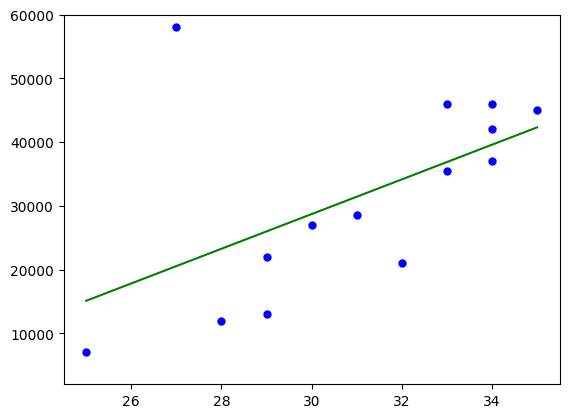

In [ ]:
plt.plot(points[0], predicciones["mean"], markersize=5,color="green" )
plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )
plt.ylim(2000, 60000)

La β0 no es un simple requisito matemático para definir una recta: podemos hacer un modelo sin ella, pero es un modelo diferente!

In [96]:

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
import statsmodels.api as sm
X_train = points[0]

#X_train = sm.add_constant(X_train, prepend=True)
modelo_ = sm.OLS(endog=points[1], exog=X_train,)
modelo_ = modelo_.fit()
print(modelo_.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):              -44551.077
Model:                            OLS   Adj. R-squared (uncentered):         -48263.750
Method:                 Least Squares   F-statistic:                             -12.00
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        1.00
Time:                        20:47:03   Log-Likelihood:                         -198.97
No. Observations:                  13   AIC:                                      399.9
Df Residuals:                      12   BIC:                                      400.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones_ = modelo_.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones_

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25729.228049,2953.317439,19348.973622,32109.482477,-4683.645245,56142.101344
1,27787.566293,3189.582834,20896.891512,34678.241075,-2736.467097,58311.599684
2,28816.735415,3307.715531,21670.850457,35962.620374,-1765.921227,59399.392058
3,29845.904537,3425.848229,22444.809402,37246.999673,-797.388769,60489.197844
4,29845.904537,3425.848229,22444.809402,37246.999673,-797.388769,60489.197844
5,30875.073659,3543.980927,23218.768347,38531.378972,169.142205,61581.005114
6,31904.242781,3662.113624,23992.727292,39815.758271,1133.683917,62674.801645
7,32933.411903,3780.246322,24766.686236,41100.137570,2096.248876,63770.574931
8,33962.581025,3898.379019,25540.645181,42384.516869,3056.849861,64868.312190
9,33962.581025,3898.379019,25540.645181,42384.516869,3056.849861,64868.312190


C:\Users\pabma\AppData\Local\Temp\ipykernel_28800\3201057670.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )


(2000.0, 50000.0)

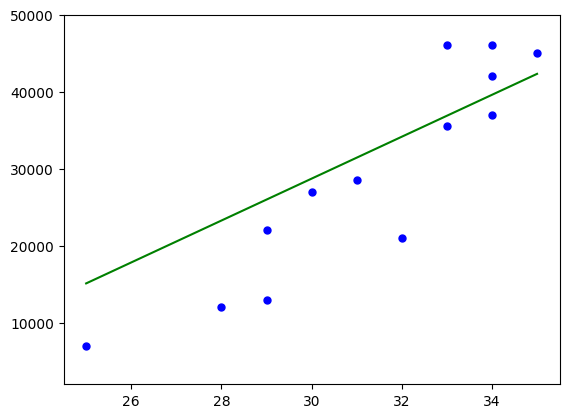

In [ ]:
plt.plot(points[0], predicciones["mean"], markersize=5,color="green" )
plt.plot(points[0], points[1],  'ro', markersize=5,color="blue" )
plt.ylim(2000, 50000)

## Interpretación del modelo

β0

  es la ordenada en el origen o intercept, se corresponde con el valor esperado de la variable respuesta  y
  cuando todos los predictores son cero.

βj

  los coeficientes de regresión parcial de cada predictor indican el cambio promedio esperado de la variable respuesta  y
  al incrementar en una unidad de la variable predictora  xj
 , manteniéndose constantes el resto de variables.

Para poder determinar qué impacto tienen en el modelo cada una de las variables, se emplean los coeficientes parciales estandarizados, que se obtienen al estandarizar (sustraer la media y dividir entre la desviación estándar) las variables predictoras previo ajuste del modelo. En este caso,  β0 se corresponde con el valor esperado de la variable respuesta cuando todos los predictores se encuentran en su valor promedio, y  βj el cambio promedio esperado de la variable respuesta al incrementar en una desviación estándar la variable predictora  xj, manteniéndose constantes el resto de variables.

## Bondad de ajuste del modelo

Una vez ajustado el modelo, es necesario verificar su utilidad ya que, aun siendo la línea que mejor se ajusta a las observaciones de entre todas las posibles, puede tener un gran error. Las métricas más utilizadas para medir la calidad del ajuste son: el error estándar de los residuos y el coeficiente de determinación  $R^2$.

### Error estándar de los residuos (Residual Standar Error, RSE)

Mide la desviación promedio de cualquier punto estimado por el modelo respecto de la recta de regresión. Tiene las mismas unidades que la variable respuesta. Una forma de saber si el valor del RSE es elevado consiste en dividirlo entre el valor medio de la variable respuesta, obteniendo así un % de la desviación.

$$ RSE = \sqrt{\frac{RSS}{n - p - 1}} $$

- `RSE` representa el Error Estándar de la Estimación.
- `RSS` es la Suma de los Cuadrados de los Residuos.
- `n` es el número total de observaciones.
- `p` es el número de predictores en el modelo (no incluyendo el término constante).

### Coeficiente de determinación  $R^2$

$R^2$ describe la proporción de varianza de la variable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0 y 1. Al ser adimensional, presenta la ventaja frente al RSE de ser más fácil de interpretar.

$$ R^2 = 1 - \frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}} $$

## Significancia del modelo F-test

Uno de los primeros resultados que hay que evaluar al ajustar un modelo es el resultado del test de significancia  $F$. Este contraste responde a la pregunta de si el modelo en su conjunto es capaz de predecir la variable respuesta mejor de lo esperado por azar, o lo que es equivalente, si al menos uno de los predictores que forman el modelo contribuye de forma significativa.

$$F = \frac{(TSS-RSS)/(p-1)}{RSS/(n-p)}$$

- `TSS` es la suma de cuadrados corregidos por la media.
- `RSS` es la Suma de los Cuadrados de los Residuos.
- `n` es el número total de observaciones.
- `p` es el número de predictores en el modelo (no incluyendo el término constante).

## Significancia de los predictores

En la mayoría de casos, aunque el estudio de regresión se aplica a una muestra, el objetivo último es obtener un modelo lineal que explique la relación entre las variables en toda la población. Esto significa que, el modelo generado, es una estimación de la relación poblacional a partir de la relación que se observa en la muestra y, por lo tanto, está sujeta a variaciones. Para cada uno de los coeficientes de la ecuación de regresión lineal ($β_j$) se puede calcular su significancia (p-value) y su intervalo de confianza. El test estadístico más empleado es el t-test (existen alternativas no paramétricas).


## Variables categóricas como predictores

Cuando se introduce una variable categórica como predictor, un nivel se considera el de referencia (normalmente codificado como 0) y el resto de niveles se comparan con él. En el caso de que el predictor categórico tenga más de dos niveles, se generan lo que se conoce como variables dummy o one-hot-encodding, que son variables creadas para cada uno de los niveles del predictor categórico y que pueden tomar el valor de 0 o 1. Cada vez que se emplee el modelo para predecir un valor, solo una variable dummy por predictor adquiere el valor 1 (la que coincida con el valor que adquiere el predictor en ese caso) mientras que el resto se consideran 0. El valor del coeficiente parcial de regresión  $β_j$ de cada variable dummy indica el porcentaje promedio en el que influye dicho nivel sobre la variable dependiente  $y$ en comparación con el nivel de referencia de dicho predictor.

La idea de variables dummy se entiende mejor con un ejemplo. Supóngase un modelo en el que la variable respuesta peso se predice en función de la altura y nacionalidad del sujeto. La variable nacionalidad es cualitativa con 3 niveles (americana, europea y asiática). A pesar de que el predictor inicial es nacionalidad, se crea una variable nueva por cada nivel, cuyo valor puede ser 0 o 1. De tal forma que la ecuación del modelo completo es:

$$ peso = β_0 + β_1 altura + β_2 americana + β_3 europea + β_ 4 asiatica

Si el sujeto es europeo, las variables dummy americana y asiática se consideran 0, de forma que el modelo para este caso se queda en:

$$ peso = β_0+β_1altura+β_3europea$$

## Predicción

Una vez generado un modelo válido, es posible predecir el valor de la variable respuesta  $y$ para nuevos valores de las variables predictoras  $x$. Es importante tener en cuenta que las predicciones deben, *a priori*, limitarse al rango de valores dentro del que se encuentran las observaciones con las que se ha entrenado el modelo. Esto es importante puesto que, aunque los modelos lineales pueden extrapolarse, solo en esta región se tiene certeza de que se cumplen las condiciones para que el modelo sea válido. Para calcular las predicciones, se emplea la ecuación generada por regresión.

$$ \hat{y}_i = \beta_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \ldots + \hat{\beta}_p x_{ip} $$

Dado que el modelo se ha obtenido a partir de una muestra, las estimaciones de los coeficientes de regresión tienen un error asociado y, por lo tanto, también lo tienen los valores de las predicciones generadas con ellos.

Existen dos formas de medir la incertidumbre asociada con una predicción

Intervalos de confianza: intervalo del valor promedio esperado de la variable respuesta  $y$ para un determinado valor  $x$ .

$$ \hat{y} \pm t_{\alpha/2, n-2} \sqrt{MSE \left( \frac{1}{n} + \frac{(x_k - \bar{x})^2}{\sum{(x_i - \bar{x})^2}} \right)} $$


Intervalos de predicción: intervalo del valor esperado de la variable respuesta  $y$ para un determinado valor  $x$.

$$ \hat{y} \pm t_{\alpha/2, n-2} \sqrt{MSE \left( 1 + \frac{1}{n} + \frac{(x_k - \bar{x})^2}{\sum{(x_i - \bar{x})^2}} \right)} $$

Donde:

- $\hat{y}$ es el valor predicho por el modelo.
- $t_{\alpha/2, n-2}$ es el valor crítico de la distribución t de Student para un nivel de confianza dado $1 − \alpha$ y $ n − 2$ grados de libertad.
- $MSE$ es el Error Cuadrático Medio.
- $n$ es el número total de observaciones.
- $x_k$ es el valor de la variable independiente para la cual se hace la predicción.
- $\bar{x}$ es la media de la variable independiente.
- $x_i$ son los valores de la variable independiente.
- $\sum{(x_i - \bar{x})^2}$ es la suma de los cuadrados de las diferencias entre cada observación de la variable independiente y la media de dicha variable.

Si bien ambos parecen similares, la diferencia se encuentra en que los intervalos de confianza se aplican al valor promedio que se espera de  $y$  para un determinado valor de  $x$, mientras que los intervalos de predicción no se aplican al promedio. Por esta razón, los segundos siempre son más amplios que los primeros.

## Validación del modelo

Una vez seleccionado el mejor modelo que se puede crear con los datos disponibles, se tiene que comprobar su capacidad prediciendo nuevas observaciones que no se hayan empleado para entrenarlo, de este modo se verifica si el modelo se puede generalizar. Una estrategia comúnmente empleada es dividir aleatoriamente los datos en dos grupos, ajustar el modelo con el primer grupo y estimar la precisión de las predicciones con el segundo.

El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados.

## Condiciones para la regresión lineal

Para que un modelo de regresión lineal por mínimos cuadrados, y las conclusiones derivadas de él, sean completamente válidas, se deben verificar que se cumplen las asunciones sobre las que se basa su desarrollo matemático. En la práctica, rara vez se cumplen, o se puede demostrar que se cumplen todas, sin embargo esto no significa que el modelo no sea útil. Lo importante es ser consciente de ellas y del impacto que esto tiene en las conclusiones que se extraen del modelo.

### No colinealidad o multicolinealidad:

En los modelos lineales múltiples, los predictores deben ser independientes, no debe de haber colinealidad entre ellos. La colinealidad ocurre cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Como consecuencia de la colinealidad, no se puede identificar de forma precisa el efecto individual que tiene cada predictor sobre la variable respuesta, lo que se traduce en un incremento de la varianza de los coeficientes de regresión estimados hasta el punto de que resulta imposible establecer su significancia estadística. Además, pequeños cambios en los datos, provocan grandes cambios en las estimaciones de los coeficientes. Si bien la colinealidad propiamente dicha existe solo si el coeficiente de correlación simple o múltiple entre predictores es 1, cosa que raramente ocurre en la realidad, es frecuente encontrar la llamada casi-colinealidad o multicolinealidad no perfecta.

No existe un método estadístico concreto para determinar la existencia de colinealidad o multicolinealidad entre los predictores de un modelo de regresión, sin embargo, se han desarrollado numerosas reglas prácticas que tratan de determinar en qué medida afectan al modelo. Los pasos recomendados a seguir son:

- Si el coeficiente de determinación  $R^2$ es alto pero ninguno de los predictores resulta significativo, hay indicios de colinealidad.

- Crear una matriz de correlación en la que se calcula la relación lineal entre cada par de predictores. Es importante tener en cuenta que, a pesar de no obtenerse ningún coeficiente de correlación alto, no está asegurado que no exista multicolinealidad. Se puede dar el caso de tener una relación lineal casi perfecta entre tres o más variables y que las correlaciones simples entre pares de estas mismas variables no sean mayores que 0.5.

- Generar un modelo de regresión lineal simple entre cada uno de los predictores frente al resto. Si en alguno de los modelos el *coeficiente de determinación  R^2 es alto, estaría señalando a una posible colinealidad.

- Tolerancia (TOL) y Factor de Inflación de la Varianza (VIF). Se trata de dos parámetros que vienen a cuantificar lo mismo (uno es el inverso del otro). El VIF de cada predictor se calcula según la siguiente fórmula:

$$ VIF_{\hat{\beta}_j} = \frac{1}{(1 - R^2)} $$

$$ Tolerancia_{\hat{\beta{}_j}} = \frac{1}{VIF_{\hat{\beta{}_j}}} $$


Donde  $R^2$ se obtiene de la regresión del predictor  $X_j$ sobre los otros predictores. Esta es la opción más recomendada, los límites de referencia que se suelen emplear son:

- VIF = 1: ausencia total de colinealidad

- 1 < VIF < 5: la regresión puede verse afectada por cierta colinealidad.

- 5 < VIF < 10: la regresión puede verse altamente afectada por cierta colinealidad.

El término tolerancia es  $\frac{1}{VIF}$ por lo que los límites recomendables están entre 1 y 0.1.

### Relación lineal entre los predictores numéricos y la variable respuesta

Cada predictor numérico tiene que estar linealmente relacionado con la variable respuesta  $y$ mientras los demás predictores se mantienen constantes, de lo contrario no se deben introducir en el modelo. La forma más recomendable de comprobarlo es representando los residuos del modelo frente a cada uno de los predictores. Si la relación es lineal, los residuos se distribuyen de forma aleatoria en torno a cero. Estos análisis son solo aproximados, ya que no hay forma de saber si realmente la relación es lineal cuando el resto de predictores se mantienen constantes.

### Distribución normal de la variable respuesta

La variable respuesta se tiene que distribuir de forma normal. Para comprobarlo se recurre a histogramas, a los cuantiles normales o a test de hipótesis de normalidad.

### Varianza constante de la variable respuesta (homocedasticidad)

La varianza de la variable respuesta debe ser constante en todo el rango de los predictores. Para comprobarlo suelen representarse los residuos del modelo frente a cada predictor. Si la varianza es constante, se distribuyen de forma aleatoria manteniendo una misma dispersión y sin ningún patrón específico. Una distribución cónica es un claro identificador de falta de homocedasticidad.

### No autocorrelación (Independencia)

Los valores de cada observación son independientes de los otros. Esto es especialmente importante de comprobar cuando se trabaja con mediciones temporales. Se recomienda representar los residuos ordenados acorde al tiempo de registro de las observaciones, si existe un cierto patrón hay indicios de autocorrelación. También se puede emplear el test de hipótesis de Durbin-Watson.

### Valores atípicos, con alto leverage o influyentes

Es importante identificar observaciones que sean atípicas o que puedan estar influenciando al modelo. La forma más fácil de detectarlas es a través de los residuos (ver más detalles adelante).

### Tamaño de la muestra

No se trata de una condición de por sí pero, si no se dispone de suficientes observaciones, los predictores que no son realmente influyentes podrían parecerlo. Una recomendación frecuente es que el número de observaciones sea como mínimo entre 10 y 20 veces el número de predictores del modelo.

### Parsimonia

Este término hace referencia a que, el mejor modelo, es aquel capaz de explicar con mayor precisión la variabilidad observada en la variable respuesta empleando el menor número de predictores, por lo tanto, con menos asunciones.


La gran mayoría de condiciones se verifican utilizando los residuos, por lo tanto, se suele generar primero el modelo y posteriormente validar las condiciones. De hecho, el ajuste de un modelo debe verse como un proceso iterativo en el que se ajusta el modelo, se evalúan sus residuos y se mejora. Así hasta llegar a un modelo óptimo.

## Valores atípicos (outliers)

Independientemente de que el modelo se haya podido aceptar, siempre es conveniente identificar si hay algún posible outlier, observación con alto leverage o influyente, puesto que podría estar condicionando en gran medida el modelo. La eliminación de este tipo de observaciones debe de analizarse con detalle y dependiendo de la finalidad del modelo. Si el fin es predictivo, un modelo sin outliers ni observaciones altamente influyentes suele ser capaz de predecir mejor la mayoría de casos. Sin embargo, es muy importante prestar atención a estos valores ya que, de no tratarse de errores de medida, pueden ser los casos más interesantes. El modo adecuado de proceder cuando se sospecha de algún posible valor atípico o influyente es calcular el modelo de regresión incluyendo y excluyendo dicho valor.

--------------

# Ejemplo regresión lineal simple

Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

## Librerías

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels import stats
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Datos

In [ ]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


## Representación gráfica

El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

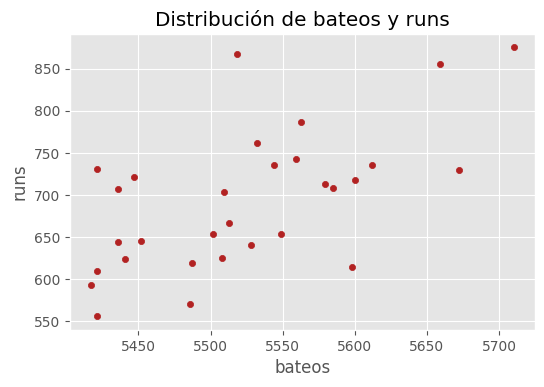

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791975


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

## Ajuste del modelo

Se ajusta un modelo empleando como variable respuesta runs y como predictor bateos. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### Scikit-Learn

In [ ]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [ ]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


### Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

- Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores.

- Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

```python
# Creación del modelo utilizando el modo fórmula
# ===========================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())
```

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Mon, 29 Apr 2024   Prob (F-statistic):            0.00906
Time:                        19:39:17   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

## Intervalos de confianza de los coeficientes

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

## Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

- .predict(): devuelve únicamente el valor de las predicciones.

- .get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


## Representación gráfica del modelo

Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

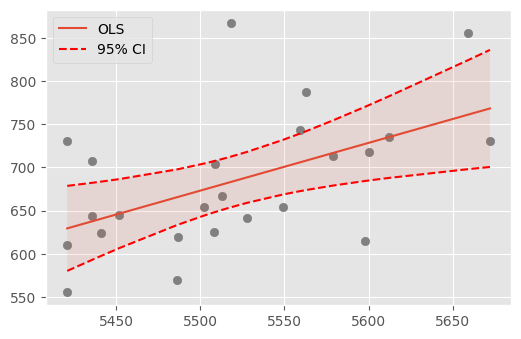

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

## Error Test

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608336157


## Interpretación

La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( $β^0$  y  $β^1$ ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de $R^2$ indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

$$ runs = -2367.7028 + 0.6305 bateos $$
 
Por cada unidad que se incrementa el número de bateos, el número de runs aumenta **en promedio** 0.6305 unidades.

El error de test del modelo es de 59.34. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real.

---------------

# Ejemplo regresión lineal múltiple

Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.

## Datos

In [ ]:
# Datos
# ==============================================================================
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})

## Relación entre variables

El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,tv,ventas,0.782224,0.782224
12,ventas,tv,0.782224,0.782224
7,radio,ventas,0.576223,0.576223
13,ventas,radio,0.576223,0.576223
6,radio,periodico,0.354104,0.354104
9,periodico,radio,0.354104,0.354104
11,periodico,ventas,0.228299,0.228299
14,ventas,periodico,0.228299,0.228299
2,tv,periodico,0.056648,0.056648
8,periodico,tv,0.056648,0.056648


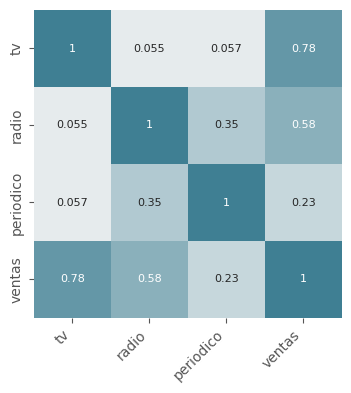

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

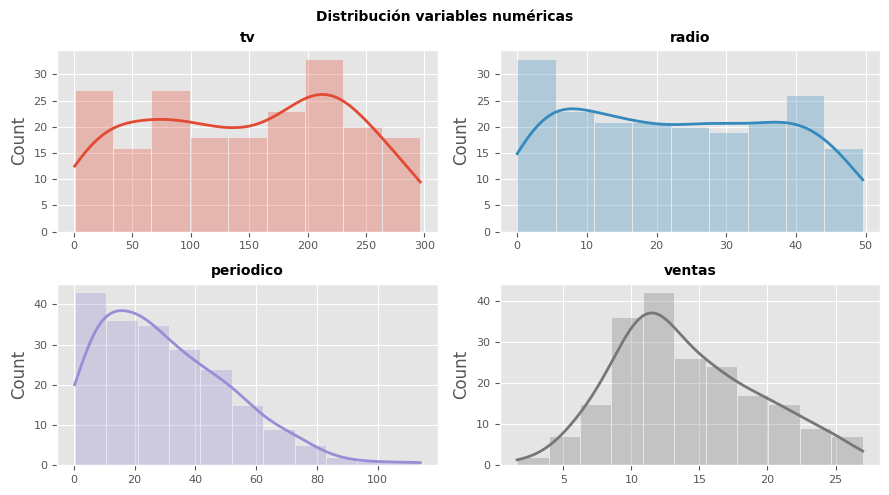

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

## Ajuste del modelo

Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas en función de la inversión en los tres canales de publicidad.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.01e-75
Time:                        19:39:18   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8497      0.365      7.803      0.0

El modelo con todas las variables introducidas como predictores tiene un  $R^2$ alto (0.894), es capaz de explicar el 89.4% de la variabilidad observada en las ventas. El p-value del modelo es significativo (1.01e-75) por lo que se puede aceptar que el modelo es mejor que lo esperado es por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.

Acorde al p-value obtenido para el coeficiente parcial de regresión de periodico (0.723), esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo el predictor periodico.

In [ ]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'periodico')
X_test  = X_test.drop(columns = 'periodico')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.69e-77
Time:                        19:39:18   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9004      0.335      8.652      0.0

## Intervalos de confianza de los coeficientes

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,2.238211,3.562549
tv,0.042439,0.048701
radio,0.172853,0.207942


## Diagnóstico de los resíduos

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

## Inspección visual

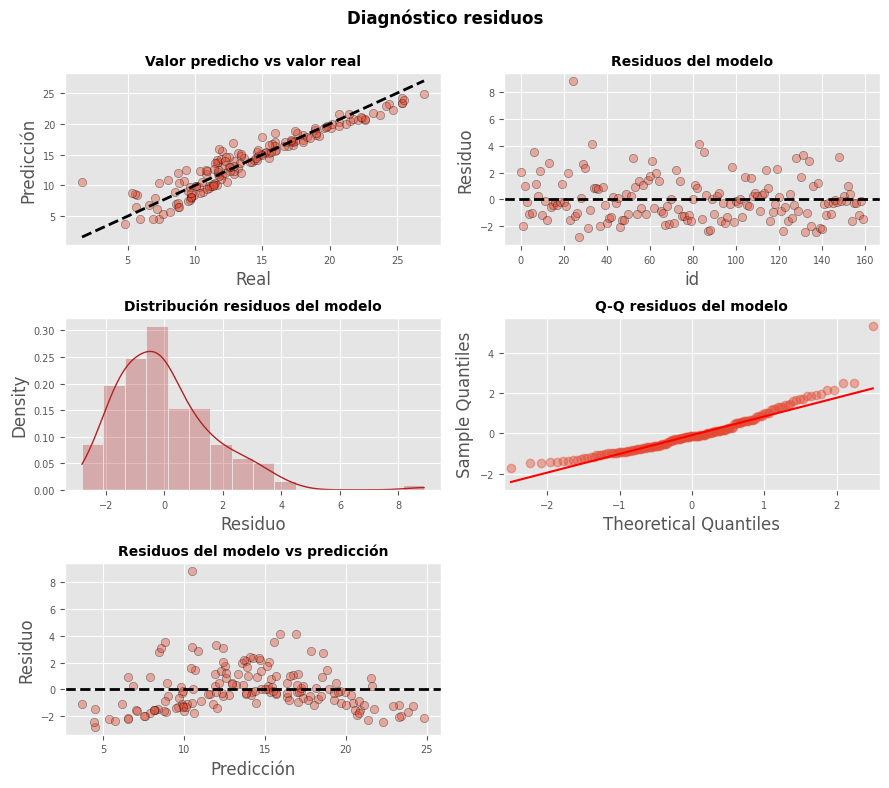

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

## Test de normalidad

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

AttributeError: module 'statsmodels.stats' has no attribute 'shapiro'

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).

## Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [ ]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

## Error de test

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

## Interpretación

El modelo de regresión lineal múltiple:

$$ ventas = 2.9004 + 0.0456tv + 0.1904radio$$
 
es capaz de explicar el 89.4% de la varianza observada en las ventas ($R^2$: 0.894, Adj. $R^2$: 0.892). El test  $F$ es significativo (p-value: 3.69e-77). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (rmse) de test es de 1.696. Las predicciones del modelo final se alejan en promedio 1.696 unidades del valor real

## Interacción entre predictores

El modelo lineal a partir del cual se han obtenido las conclusiones asume que el efecto sobre las ventas debido a un incremento en el presupuesto de uno de los medios de comunicación es independiente del presupuesto gastado en los otros. Por ejemplo, el modelo lineal considera que el efecto promedio sobre las ventas debido a aumentar en una unidad el presupuesto de anuncios en TV es siempre de 0.0456, independientemente de la cantidad invertida en anuncios por radio. Sin embargo, esto no tiene por qué ser necesariamente así, puede existir interacción entre los predictores de forma que, el efecto de cada uno de ellos sobre la variable respuesta, depende en cierta medida del valor que tome el otro predictor.

En stastmodels se puede introducir interacción entre predictores de dos formas:

- Indicandolo en la fórmula con el término *: ventas ~ tv * radio

Añadiendo una nueva columna con la multiplicación de los predictores cuya interacción se quiere incluir en el modelo.

In [ ]:
# Creación del modelo con interacciones utilizando matrices
# ==============================================================================
# Se añade una nueva columna con la interacción
X_train['tv_radio'] = X_train['tv'] * X_train['radio']
X_test['tv_radio']  = X_test['tv'] * X_test['radio']

# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo_interacion  = sm.OLS(endog=y_train, exog=X_train,)
modelo_interacion  = modelo_interacion.fit()
print(modelo_interacion.summary())

Los resultados muestran una evidencia clara de que la interacción tv radio es significativa (p-value* muy próximo a 0).

El modelo que incorpora la interacción tiene un Adjusted $R^2$ de 0.967, un valor superior al 0.892 del modelo que solo contemplaba el efecto de los predictores por separado. Ahora bien, ¿Es suficiente esta diferencia para afirmar que el modelo con interacción es superior? Una forma de responder a esta pregunta es recurriendo al F-test (ANOVA)

## Comparación de modelos mediante test F-test (ANOVA)

Supóngase un modelo $M$ y otro modelo $m$, de menor tamaño, formado por un subconjunto de los predictores contenidos en  $M$. Si la diferencia en el ajuste es muy pequeña, acorde al principio de parsimonia, el modelo  $m$ es más adecuado. Es posible contrastar si la diferencia en ajuste es significativa mediante la comparación de los residuos. En concreto el estadístico empleado es:

$$ \frac{RSS_m - RSS_M}{RSS_M} $$

In [ ]:
anova_lm(modelo, modelo_interacion)

El test ANOVA encuentra evidencias claras (p-value prácticamente de cero) de que el modelo que incluye la interacción entre predictores es capaz de modelar mejor la variable respuesta.

Esta forma de comparar modelos está muy arraigada en la comunidad estadística. Es mucho más común comparar modelos con técnicas de validación como la validación cruzada.